単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
wv['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
sim = wv.similarity('United_States', 'U.S.')

print(f'コサイン類似度: {sim}')

コサイン類似度: 0.7310774326324463


## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
import pandas as pd
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
r = wv.most_similar('United_States')

pd.DataFrame(r, columns=['単語', '類似度'])

,単語,類似度
0,Unites_States,0.787725
1,Untied_States,0.754137
2,United_Sates,0.740072
3,U.S.,0.731077
4,theUnited_States,0.640439
5,America,0.617841
6,UnitedStates,0.616731
7,Europe,0.613299
8,countries,0.604480
9,Canada,0.601907


## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
import pandas as pd
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
r = wv.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

pd.DataFrame(r, columns=['単語', '類似度'])

,単語,類似度
0,Greece,0.689848
1,Aristeidis_Grigoriadis,0.560685
2,Ioannis_Drymonakos,0.555291
3,Greeks,0.545069
4,Ioannis_Christou,0.540086
5,Hrysopiyi_Devetzi,0.524844
6,Heraklio,0.520776
7,Athens_Greece,0.516881
8,Lithuania,0.516687
9,Iraklion,0.514679


## 64. アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
!curl http://download.tensorflow.org/data/questions-words.txt -o questions-words.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  589k  100  589k    0     0   589k      0  0:00:01 --:--:--  0:00:01  674k


In [6]:
# wv.most_similarに時間がかかるので、半分に減らす
with open('questions-words.txt') as f:
    flag = 0
    lines = []
    for line in iter(f.readline, ''):
        if line.startswith(':'):
            lines.append(line)
        else:
            if flag:
                lines.append(line)
            flag = 1 - flag

with open('questions-words.txt', 'w') as f:
    f.write(''.join(lines))

In [7]:
import pandas as pd
from gensim.models import KeyedVectors
from tqdm.notebook import tqdm

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

with open('questions-words.txt') as f:
    items = []
    for line in tqdm(f.readlines()):
        if (line := line.strip()):
            if line.startswith(':'):
                cat = line[1:].strip()
            else:
                w1, w2, w3, w4 = line.split(' ')
                w = wv.most_similar(positive=[w2, w3], negative=[w1])[0]
                items.append([cat, w1, w2, w3, w4, w[0], w[1]])

pd.DataFrame(items).to_csv('questions-words-64.txt', sep=' ', header=False, index=False)

  0%|          | 0/9786 [00:00<?, ?it/s]

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

- 意味的アナロジー：下記以外（e.g. `capital-common-countries`, `city-in-state`）  
- 文法的アナロジー：`gram`で始まっている項目（e.g. `gram1-adjective-to-adverb`, `gram7-past-tense`）

In [8]:
df = pd.read_table('questions-words-64.txt', delimiter=' ', header=None)
df.columns = ['category', 'word1', 'word2', 'word3', 'word4', 'pred', 'prob']
df = pd.concat([
    df['category'], pd.DataFrame(df['word4'] == df['pred']).astype(int)
], axis=1)

df_sem = df[~df['category'].str.startswith('gram')]
print(f'意味的アナロジーの正解率: {df_sem[0].sum() / len(df_sem)}')

df_syn = df[df['category'].str.startswith('gram')]
print(f'文法的アナロジーの正解率: {df_syn[0].sum() / len(df_syn)}')

意味的アナロジーの正解率: 0.7440234551195309
文法的アナロジーの正解率: 0.7439115773698014


## 66. WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [9]:
import pandas as pd
from gensim.models import KeyedVectors
from scipy import stats

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

df = pd.read_csv('wordsim353/combined.csv')
human = df['Human (mean)'] / 10

word2vec = []
for w1, w2 in zip(df['Word 1'], df['Word 2']):
    prob = wv.similarity(w1, w2)
    word2vec.append(prob)

correlation, pvalue = stats.spearmanr(human, word2vec)
print(f'スピアマン相関係数: {correlation}')

スピアマン相関係数: 0.7000166486272194


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [10]:
# 以下URLをcountries.txtという名前で保存して使用。
# https://gist.githubusercontent.com/kalinchernev/486393efcca01623b18d/raw/daa24c9fea66afb7d68f8d69f0c4b8eeb9406e83/countries
import numpy as np
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

vectors = []
names = []
with open('countries.txt') as f:
    for line in iter(f.readline, ''):
        if (name := line.strip()) and name not in names:
            try:
                vectors.append(wv[name])
                names.append(name)
            except:
                pass

np.savez('country_vectors_and_names', vectors=vectors, names=names)

In [11]:
import numpy as np
from sklearn.cluster import KMeans
seed = 42

data = np.load('country_vectors_and_names.npz')
vectors, names = data['vectors'], data['names']

kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(vectors)

num = 9
for i in range(5):
    countries = []
    for j, label in enumerate(kmeans.labels_):
        if label == i:
            countries.append(names[j])
    print(f'クラスタ: {i}')
    for k in range(len(countries) // num + 1):
        row = ', '.join(countries[k * num:(k + 1) * num])
        if row:
            print(f'  {row}')

クラスタ: 0
  Algeria, Angola, Benin, Botswana, Burkina, Burundi, Cameroon, Comoros, Congo
  Djibouti, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Kenya, Lesotho
  Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Mozambique, Namibia, Niger
  Nigeria, Rwanda, Senegal, Seychelles, Somalia, Sudan, Swaziland, Tanzania, Togo
  Tunisia, Uganda, Zambia, Zimbabwe
クラスタ: 1
  Argentina, Barbados, Belize, Bolivia, Brazil, Canada, Chile, Colombia, Cuba
  Dominica, Ecuador, Grenada, Guatemala, Guyana, Haiti, Honduras, Jamaica, Mexico
  Nicaragua, Panama, Paraguay, Peru, Philippines, Suriname, Uruguay, Venezuela
クラスタ: 2
  Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bulgaria, Croatia
  Cyprus, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary
  Iceland, Italy, Kosovo, Latvia, Liechtenstein, Lithuania, Luxembourg, Macedonia, Malta
  Moldova, Monaco, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia
  Slovakia, Slovenia, Spain, Sweden, 

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

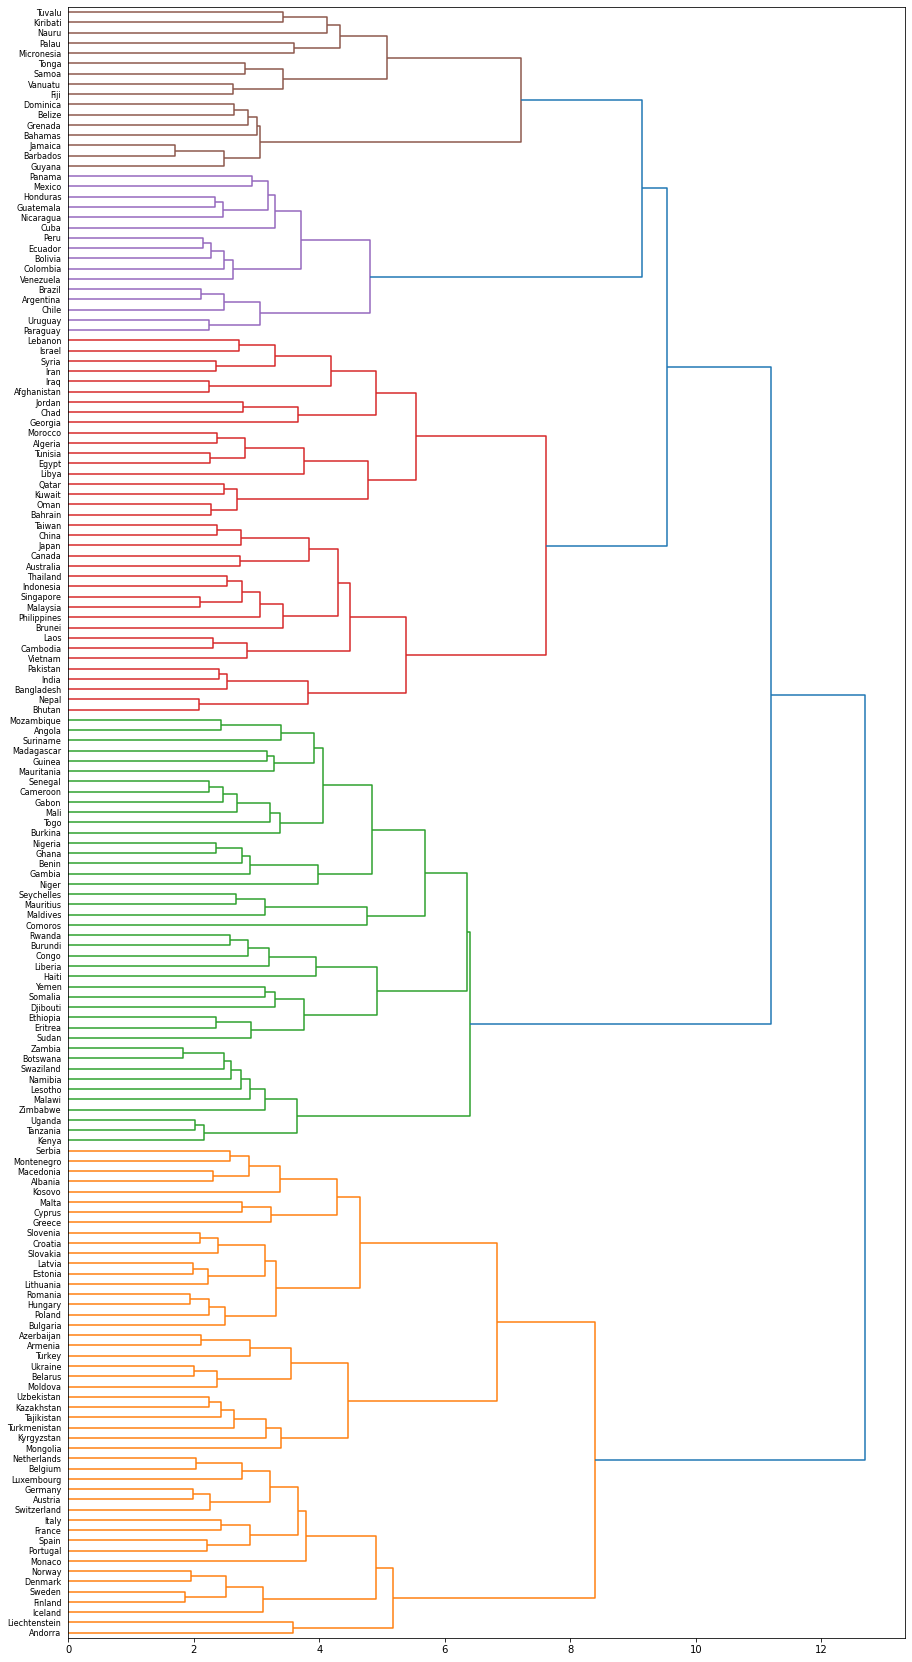

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

data = np.load('country_vectors_and_names.npz')
vectors, names = data['vectors'], data['names']

cluster = linkage(vectors, method='ward')

plt.figure(figsize=(15, 30))
dendrogram(cluster, labels=names, leaf_font_size=8, orientation='right')
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

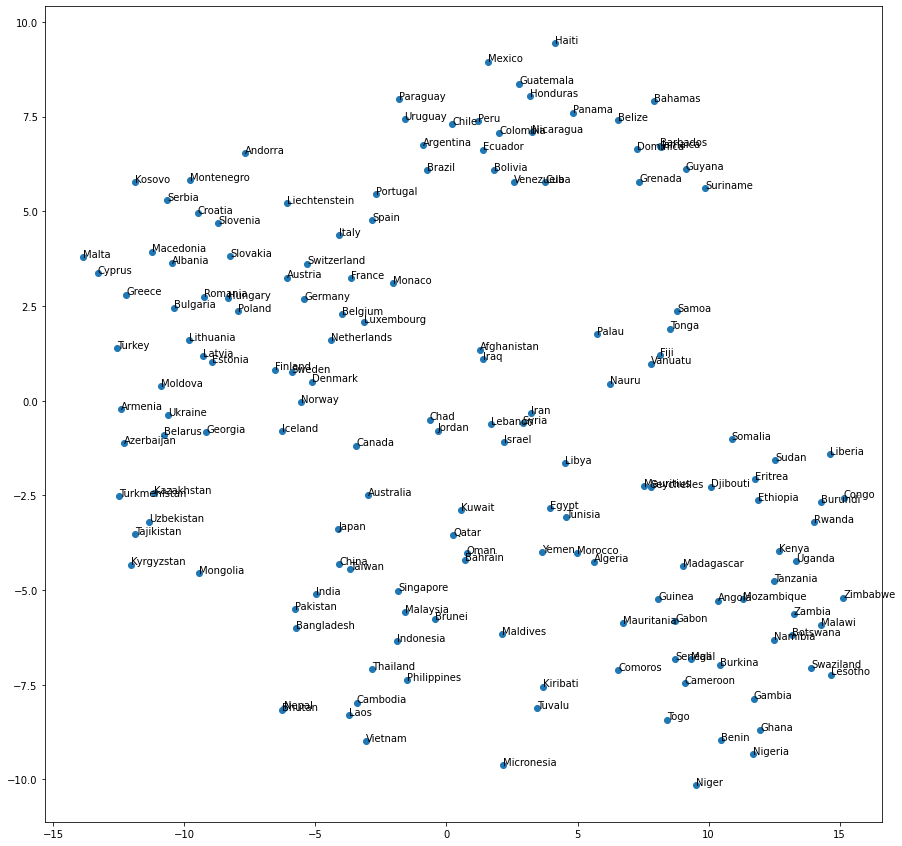

In [13]:
import numpy as np
from sklearn.manifold import TSNE

data = np.load('country_vectors_and_names.npz')
vectors, names = data['vectors'], data['names']

tsne = TSNE(n_components=2)
t_sne = tsne.fit_transform(vectors)

plt.figure(figsize=(15, 15))
plt.scatter(t_sne.T[0], t_sne.T[1])
for name, x, y in zip(names, t_sne.T[0], t_sne.T[1]):
    plt.annotate(name, (x, y))
plt.show()